In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split #Preparar o dataset para treino e teste
import matplotlib.pyplot as plt #Fazer alguns graficos
from sklearn.metrics import mean_absolute_error
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
litoral = pd.read_excel("Base_de_dados_IBP.xlsx",sheet_name = "LIT") #Regressão,ensemble,pycaret
litoral = litoral.drop('CD_MUN',axis=1)
litoral = litoral.fillna(0)
y = litoral['IQ']
X = litoral.drop('IQ',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
feature_list = ['IBP','IDEB','Royal'] 

In [8]:
#Indiano

############################################
#Predict on test data
reg4 = MLPRegressor()
reg4.fit(X, y)
y_pred_nn = reg4.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print('Mean squared error from neural network: ', mse_nn)
print('Mean absolute error from neural network: ', mae_nn)
##############################################

#Comparison with other models..
#Neural network - from the current code
#mse_neural, mae_neural = reg4.evaluate(X_test_scaled, y_test)
#print('Mean squared error from neural net: ', mse_neural)
#print('Mean absolute error from neural net: ', mae_neural)

######################################################################
#Linear regression

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)
feature_imp_dt = pd.Series(tree.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_dt)
##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp_rf = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_rf)

###########
#GradientBoostRegressor
reg1 = GradientBoostingRegressor(random_state=1)
reg1.fit(X_train_scaled, y_train)
y_pred_boost = reg1.predict(X_test_scaled)
mse_bt = mean_squared_error(y_test, y_pred_boost)
mae_bt = mean_absolute_error(y_test, y_pred_boost)
print('Mean squared error using gradient boost regressor: ', mse_bt)
print('Mean absolute error using gradient boost regressor: ', mae_bt)
feature_imp_gdb = pd.Series(reg1.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_gdb)

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)
print('Mean squared error using SGDRegressor: ', mean_squared_error(y_test, y_pred_sgd))
print('Mean absolute error using SGDRegressor ', mean_absolute_error(y_test, y_pred_sgd))
#feature_imp_sgdb = pd.Series(sgd.feature_importances_, index=feature_list).sort_values(ascending=False)
#print(feature_imp_sgdb)


########## KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print('Mean squared error using KNN: ',mean_squared_error(y_test, y_pred_knn))
print('Mean absolute error using KNN ', mean_absolute_error(y_test, y_pred_knn))
#feature_imp_knn = pd.Series(knn.feature_importances_, index=feature_list).sort_values(ascending=False)
#print(feature_imp_knn)

########## XGB

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print(mean_squared_error(y_test, y_pred_xgb))
print('Mean squared error using xgb: ',mean_squared_error(y_test, y_pred_xgb))
print('Mean absolute error using xgb ', mean_absolute_error(y_test, y_pred_xgb))
feature_imp_xgb = pd.Series(xgb.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp_xgb)

Mean squared error from neural network:  11.211108662850856
Mean absolute error from neural network:  1.4743588336420075
Mean squared error from linear regression:  0.14021397272641675
Mean absolute error from linear regression:  0.30311831175792314
Mean squared error using decision tree:  0.3383707271151185
Mean absolute error using decision tree:  0.423750431509274
IBP      0.507788
IDEB     0.250995
Royal    0.241217
dtype: float64
Mean squared error using Random Forest:  0.20426935206661903
Mean absolute error Using Random Forest:  0.36393493829009277
IBP      0.389843
Royal    0.370753
IDEB     0.239404
dtype: float64
Mean squared error using gradient boost regressor:  0.28347695713591525
Mean absolute error using gradient boost regressor:  0.4257919145363595
Royal    0.466861
IBP      0.378435
IDEB     0.154705
dtype: float64
Mean squared error using SGDRegressor:  4.119955654204254e+27
Mean absolute error using SGDRegressor  28094054992636.785
Mean squared error using KNN:  0.18

In [9]:
#R2 do modelo
print(reg4.score(X_test_scaled, y_test), lr_model.score(X_test_scaled, y_test),
      tree.score(X_test_scaled, y_test), model.score(X_test_scaled, y_test), reg1.score(X_test_scaled, y_test),
     sgd.score(X_test_scaled, y_test), knn.score(X_test_scaled, y_test), xgb.score(X_test_scaled, y_test))

-68.76857216021547 0.12742539848455026 -1.1057366583076695 -0.2712017569684635 -0.7641237039500917 -2.5639161299873056e+28 -0.1335542016151594 -0.6286654973135049


VotingRegressor(estimators=[('NN', MLPRegressor()), ('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()),
                            ('RF',
                             RandomForestRegressor(n_estimators=30,
                                                   random_state=30)),
                            ('gb', GradientBoostingRegressor(random_state=1)),
                            ('sgd', SGDRegressor()),
                            ('knn', KNeighborsRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylev...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
   

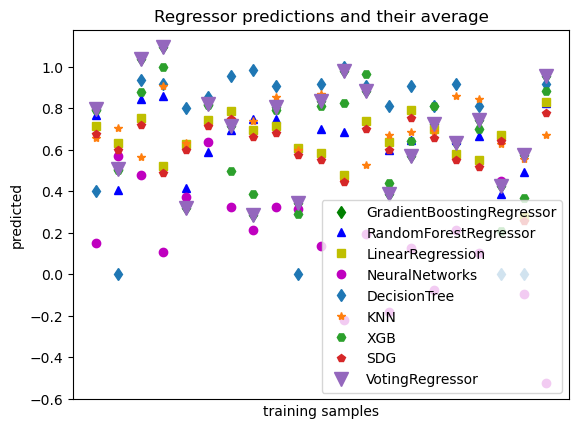

Mean squared error using ens:  0.1831094154843805
Mean absolute error using ens  0.3434142768498381
R2 -0.13951999321610975


In [6]:
######GRAFICOS C/ TODOS - emsemble
ereg = VotingRegressor(estimators=[('NN', reg4), ('lr', lr_model), ('dt', tree), ('RF', model), ('gb', reg1), ('sgd', sgd), 
                                   ('knn', knn), ('xgb', xgb)])
print(ereg.fit(X_train_scaled, y_train))
pred1 = y_pred_nn
pred2 = y_pred_lr
pred3 = y_pred_tree
pred4 = y_pred_RF
pred5 = y_pred_boost
pred6 = y_pred_sgd
pred7 = y_pred_knn
pred8 = y_pred_xgb
plt.figure()
plt.plot(pred5, 'gd', label='GradientBoostingRegressor')
plt.plot(pred4, 'b^', label='RandomForestRegressor')
plt.plot(pred2, 'ys', label='LinearRegression')
plt.plot(pred1, 'mo', label='NeuralNetworks')
plt.plot(pred3, 'd', label='DecisionTree')
plt.plot(pred7, '*', label='KNN')
plt.plot(pred8, 'H', label='XGB')
plt.plot(pred6, 'p', label='SDG')
plt.plot(pred5, 'v', ms=10, label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.show()

y_pred_ens = ereg.predict(X_test_scaled)
print('Mean squared error using ens: ',mean_squared_error(y_test, y_pred_ens))
print('Mean absolute error using ens ', mean_absolute_error(y_test, y_pred_ens))
print('R2', ereg.score(X_test_scaled, y_test))

Text(0, 0.5, 'MAE')

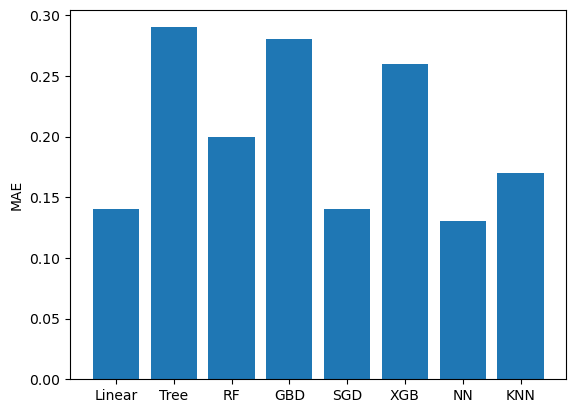

In [17]:
estimators=[('NN', reg4), ('lr', lr_model), ('dt', tree), ('RF', model), ('gb', reg1), ('sgd', sgd), 
                                   ('knn', knn), ('xgb', xgb)]
models = {'model' : ['Linear','Tree','RF','GBD','SGD','XGB','NN','KNN'], 'MAE': [0.3,0.38,0.36,0.42,0.31,0.41,0.32,0.33],
         'MSE':[0.14, 0.29, 0.20, 0.28,0.14,0.26,0.13,0.17]}
plt.bar(models['model'], models['MSE'])
plt.ylabel("MAE")

In [19]:
#REGRESSAO E STATSMODEL
import numpy as np

model = sm.OLS(y,X)
results = model.fit()
print (results.params)
print (results.summary())
y_pred=results.predict(X)


IBP     -0.066099
IDEB     0.136097
Royal    0.000211
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                     IQ   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              99.56
Date:                Tue, 12 Sep 2023   Prob (F-statistic):                    1.22e-29
Time:                        16:48:11   Log-Likelihood:                         -41.021
No. Observations:                 101   AIC:                                      88.04
Df Residuals:                      98   BIC:                                      95.89
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>